In [35]:
#Colab에서 Pytorch 실행
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist.data/255.0
y = mnist.target

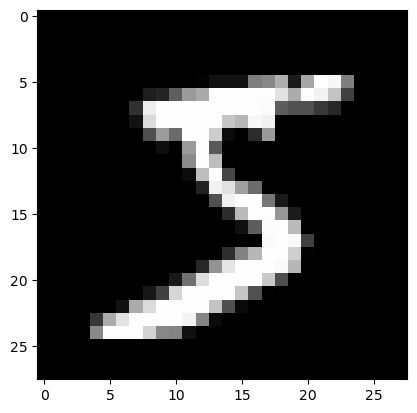

이미지 레이블 : 5


In [36]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.show()
print('이미지 레이블 : {}'.format(y[0]))

In [37]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7., random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor (list (map(int, y_train)))
y_test = torch.LongTensor (list(map(int, y_test)))
ds_train = TensorDataset (X_train, y_train)
ds_test = TensorDataset (X_test, y_test)
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True) 
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


In [38]:
from torch import nn
model = nn. Sequential()
model.add_module('fc1', nn. Linear (28+28+1, 100))
model.add_module('relul', nn. ReLU())
model.add_module('fc2', nn. Linear (100, 100))
model.add_module('relu2', nn. ReLU())
model.add_module('fc3', nn. Linear (100, 10))


In [49]:
from torch import optim
loss_fn = nn. CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [50]:
def train(epoch):
    model.train()
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward() 
        optimizer.step()
    print('epoch {}: 완료'.format(epoch))

In [51]:
def test(head):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets. data.view_as(predicted)).sum() 
        data_num = len(loader_test.dataset)
        print('accuracy = ', 100*correct/data_num)

In [55]:
for epoch in range(3):
    train(epoch)
    #test('학습중')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x784 and 57x100)